In [1]:
!pip install auto_ts


     |████████████████████████████████| 51kB 3.1MB/s 
     |████████████████████████████████| 1.3MB 7.0MB/s 
     |████████████████████████████████| 962kB 29.9MB/s 
  Created wheel for pyflux: filename=pyflux-0.4.15-cp36-cp36m-linux_x86_64.whl size=4656583 sha256=4d8005207c837f057f8c8e2c625d006d296fe5ae6dccad890827ca575aae6f3d
  Stored in directory: /root/.cache/pip/wheels/36/24/09/d18fa4f926cc90598d23ebd09fb4b0fd7b3dd1d2f506b952de
Successfully built pyflux


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
import auto_ts as AT

import pandas as pd

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

Running Auto Timeseries version: 0.0.20...Call by using:
        auto_ts.Auto_Timeseries(traindata, ts_column,
                            target, sep,  score_type='rmse', forecast_period=5,
                            time_interval='Month', non_seasonal_pdq=None, seasonality=False,
                            seasonal_period=12, seasonal_PDQ=None, model_type='stats',
                            verbose=1)
    To run three models from Stats, ML and FB Prophet, set model_type='best'
To remove previous versions, perform 'pip uninstall auto_ts'
To get the latest version, perform "pip install auto_ts --no-cache-dir --ignore-installed"


In [ ]:

def parse(x):
	return datetime.strptime(x, '%m/%d/%Y')

In [56]:
df = pd.read_csv('/content/StatewiseTestingDetails.csv', parse_dates = ['Date'])


In [37]:
df

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
...,...,...,...,...,...
2431,2020-06-21,West Bengal,401491.0,NaN,13945.0
2432,2020-06-22,West Bengal,410854.0,NaN,14358.0
2433,2020-06-23,West Bengal,420277.0,NaN,14728.0
2434,2020-06-24,West Bengal,429766.0,NaN,15173.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2436 entries, 0 to 2435
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          2436 non-null   datetime64[ns]
 1   State         2436 non-null   object        
 2   TotalSamples  2436 non-null   float64       
 3   Negative      1774 non-null   object        
 4   Positive      2428 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 95.3+ KB


,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
...,...,...,...,...,...
2431,2020-06-21,West Bengal,401491.0,NaN,13945.0
2432,2020-06-22,West Bengal,410854.0,NaN,14358.0
2433,2020-06-23,West Bengal,420277.0,NaN,14728.0
2434,2020-06-24,West Bengal,429766.0,NaN,15173.0


In [9]:

print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().any())
print ("\nUnique values :  \n",df.nunique())

Rows     :  2436
Columns  :  5

Features : 
 ['Date', 'State', 'TotalSamples', 'Negative', 'Positive']

Missing values :   Date            False
State           False
TotalSamples    False
Negative         True
Positive         True
dtype: bool

Unique values :  
 Date              86
State             35
TotalSamples    2342
Negative        1734
Positive        1484
dtype: int64


Date              0
State             0
TotalSamples      0
Negative        662
Positive          8
dtype: int64

In [22]:
df = df[~df.Positive.isnull()]

In [24]:
df.isnull().sum()

Date              0
State             0
TotalSamples      0
Negative        655
Positive          0
dtype: int64

In [30]:
df_with_index=df.set_index('Date')

In [61]:
tamil=df_with_index[df_with_index['State']=='Tamil Nadu']

In [42]:
tamil

,State,TotalSamples,Negative,Positive
Date,,,,
2020-04-03,Tamil Nadu,3684.0,2789,411.0
2020-04-08,Tamil Nadu,5305.0,4414,690.0
2020-04-09,Tamil Nadu,7267.0,5824,834.0
2020-04-10,Tamil Nadu,8410.0,6838,911.0
2020-04-11,Tamil Nadu,9842.0,7779,969.0
...,...,...,...,...
2020-06-21,Tamil Nadu,892612.0,832720,59377.0
2020-06-22,Tamil Nadu,919204.0,856475,62087.0
2020-06-23,Tamil Nadu,944352.0,879176,64603.0


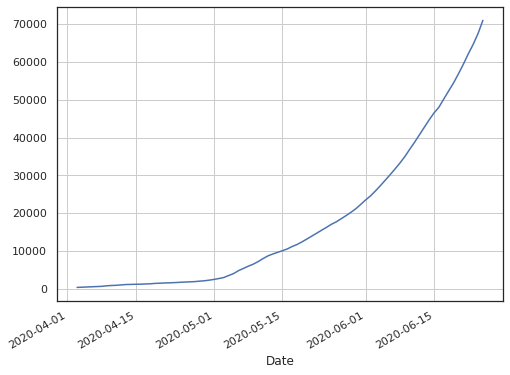

In [43]:
tamil['Positive'].plot(grid=True)

In [47]:

ec_data = tamil['Positive']
ec_data.head()

Date
2020-04-03    411.0
2020-04-08    690.0
2020-04-09    834.0
2020-04-10    911.0
2020-04-11    969.0
Name: Positive, dtype: float64

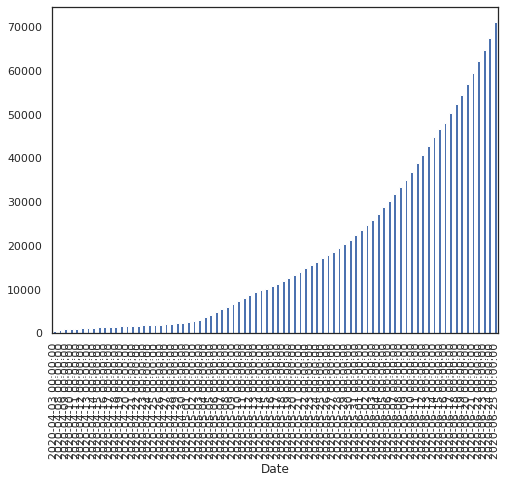

In [48]:
ec_data.plot.bar()

In [51]:

train = ec_data[:50]
test = ec_data[50:]
print(train.shape, test.shape)
train.head()

(50,) (30,)


Date
2020-04-03    411.0
2020-04-08    690.0
2020-04-09    834.0
2020-04-10    911.0
2020-04-11    969.0
Name: Positive, dtype: float64

In [63]:
tamil=df[df['State']=='Tamil Nadu']

In [64]:
ts_column = 'Date'
sep = ','
target = 'Positive'

In [55]:
tamil

,State,TotalSamples,Negative,Positive
Date,,,,
2020-04-03,Tamil Nadu,3684.0,2789,411.0
2020-04-08,Tamil Nadu,5305.0,4414,690.0
2020-04-09,Tamil Nadu,7267.0,5824,834.0
2020-04-10,Tamil Nadu,8410.0,6838,911.0
2020-04-11,Tamil Nadu,9842.0,7779,969.0
...,...,...,...,...
2020-06-21,Tamil Nadu,892612.0,832720,59377.0
2020-06-22,Tamil Nadu,919204.0,856475,62087.0
2020-06-23,Tamil Nadu,944352.0,879176,64603.0


Input is data frame. Performing Time Series Analysis
    Dataframe loaded successfully. Shape of data set = (80, 4)
    Target variable = Positive
Time Interval is given as Months

Running Facebook Prophet Model...
Preparing Time Series data for FB Prophet: sample row before
             Positive       State  TotalSamples Negative
Date                                                   
2020-04-03     411.0  Tamil Nadu        3684.0     2789
Time Series data: sample row after transformation
           ds      y       State  TotalSamples Negative
0 2020-04-03  411.0  Tamil Nadu        3684.0     2789
    Fit-Predict data (shape=(80, 2)) with Confidence Interval = 0.95...
Building Forecast dataframe. Forecast Period = 6


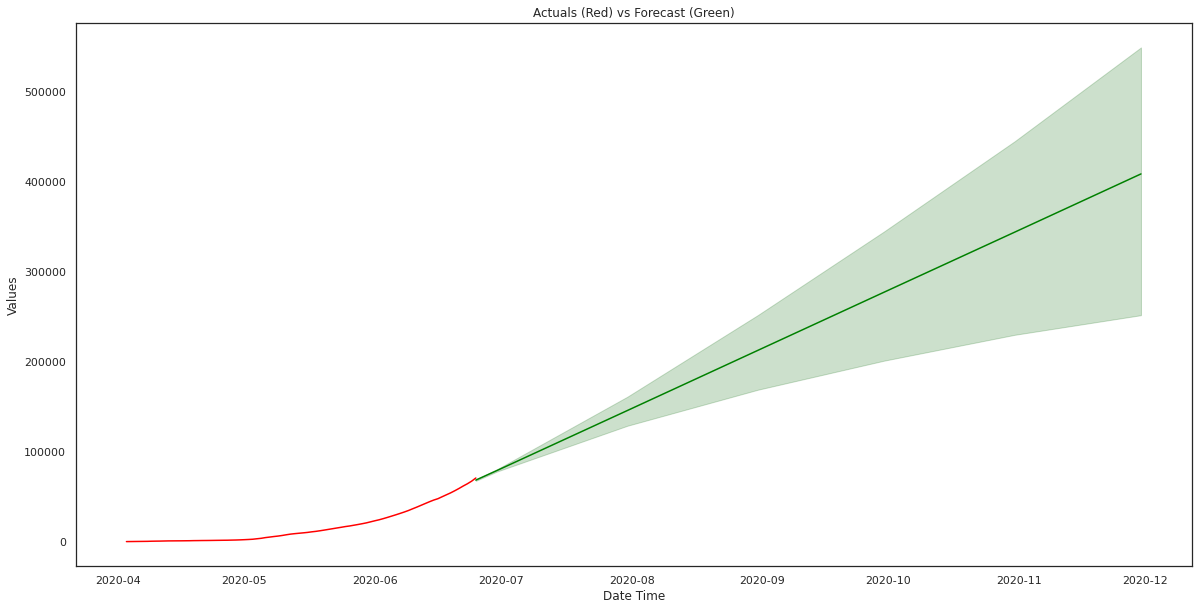

    RMSE = 2,328.45
    Std Deviation of Originals = 19,718.37
    Normalized RMSE = 12%

Running PyFlux Model...
Cycling through various (p,d,q) parameters

Best Params Selected (based on rmse): (3, 1, 3)
Dynamic 6-period Forecasts:
    RMSE = 8,295.03
    Std Deviation of Originals = 15,438.36
    Normalized RMSE = 54%

Running Non Seasonal ARIMA Model...

Differencing = 0
 Iteration 0 completed...
    Best AR order p = 1, MA order q = 0, Interim metric = 1300.025

Differencing = 1
    Best AR order p = 1, MA order q = 0, Interim metric = 929.736

Best model is: Non Seasonal ARIMA(1,1,0), aic = 929.736
####    Fitting best model for full data set now. Will take time... ######
Static Forecasts:
    ARIMA model error: predictions not available.

Running Seasonal SARIMAX Model...
Building a Non Seasonal Model...

Finding best Non Seasonal Parameters:

Differencing = 0
    Iteration 0 completed...
    Best AR order p = 2, MA order q = 3, Interim metric = 879.629

Differencing = 1
    D =

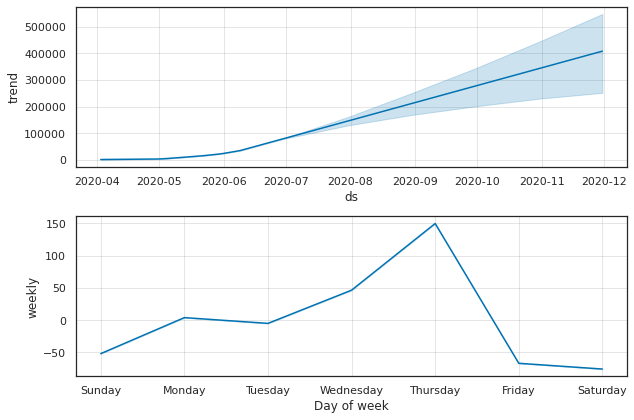

In [65]:
ml_dict = AT.Auto_Timeseries(tamil, ts_column,
                            target, sep,  score_type='rmse', forecast_period=6,
                            time_interval='Months', non_seasonal_pdq=None, seasonality=False,
                            seasonal_period=12,seasonal_PDQ=None, model_type='best',
                            verbose=2)